In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns
import nltk
from typing import Set, List, Dict
import functools
from collections import Counter
import csv
import stopwordsiso as stopwords

In [2]:
sns.set(font_scale=1.4)

In [17]:
def wordcounts(csvpath, isocode, filter_stopwords=True):
    all_frequencies = Counter()
    if filter_stopwords:
        frequencies_without_stopwords = Counter()
        stops = stopwords.stopwords(isocode)
        if not stops:
            raise ValueError(f"unknown isocode for {isocode}")
    else:
        frequencies_without_stopwords = None
        
    with open(csvpath, 'r') as fh:
        reader = csv.reader(fh)
        for ix,row in enumerate(reader):
            if ix == 0:
                continue # skips header
            words = row[2].split()
            for w in words:
                all_frequencies[w] += 1
                if filter_stopwords and not w in stops:
                    frequencies_without_stopwords[w] += 1
    
    return all_frequencies, frequencies_without_stopwords

In [20]:
def english():
    en_top, filtered_en_top = wordcounts("../common-voice-forced-alignments/en/validated-tophalf.csv", "en")
    en_low, filtered_en_low = wordcounts("../common-voice-forced-alignments/en/validated-bottomhalf.csv", "en")
    return en_top + en_low, filtered_en_top + filtered_en_low

In [21]:
en, filtered_en = english()

In [11]:
alignments = os.listdir("../common-voice-forced-alignments/")
alignments = list(filter(lambda a: len(a) == 2 and a != 'en',alignments))
print(alignments)

['pl', 'id', 'de', 'ja', 'cy', 'eo', 'eu', 'uk', 'ca', 'br', 'pt', 'ar', 'tr', 'fr', 'tt', 'ta', 'es', 'nl', 'ru', 'cv']


In [25]:
counts = {}
unknown_isos = ["cy", "tt", "ta", "cv"]
for a in alignments:
    print(a)
    filter_stopwords = a not in unknown_isos
    csvpath = f"../common-voice-forced-alignments/{a}/validated.csv"
    counts[a] = wordcounts(csvpath=csvpath, isocode=a, filter_stopwords=filter_stopwords)

pl
id
de
ja
cy
eo
eu
uk
ca
br
pt
ar
tr
fr
tt
ta
es
nl
ru
cv


In [26]:
counts.keys()

dict_keys(['pl', 'id', 'de', 'ja', 'cy', 'eo', 'eu', 'uk', 'ca', 'br', 'pt', 'ar', 'tr', 'fr', 'tt', 'ta', 'es', 'nl', 'ru', 'cv'])

In [57]:
sws = stopwords.stopwords('en')
print(len(sws))
list(sws)[:15]

1298


['ve',
 'sm',
 'act',
 'they',
 'overall',
 'consider',
 'welcome',
 'refs',
 'kept',
 'sometime',
 'maynt',
 'isnt',
 'contain',
 'goes',
 'np']

In [27]:
common = en.most_common(300)

/home/mark/miniconda3/envs/tinyspeech/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


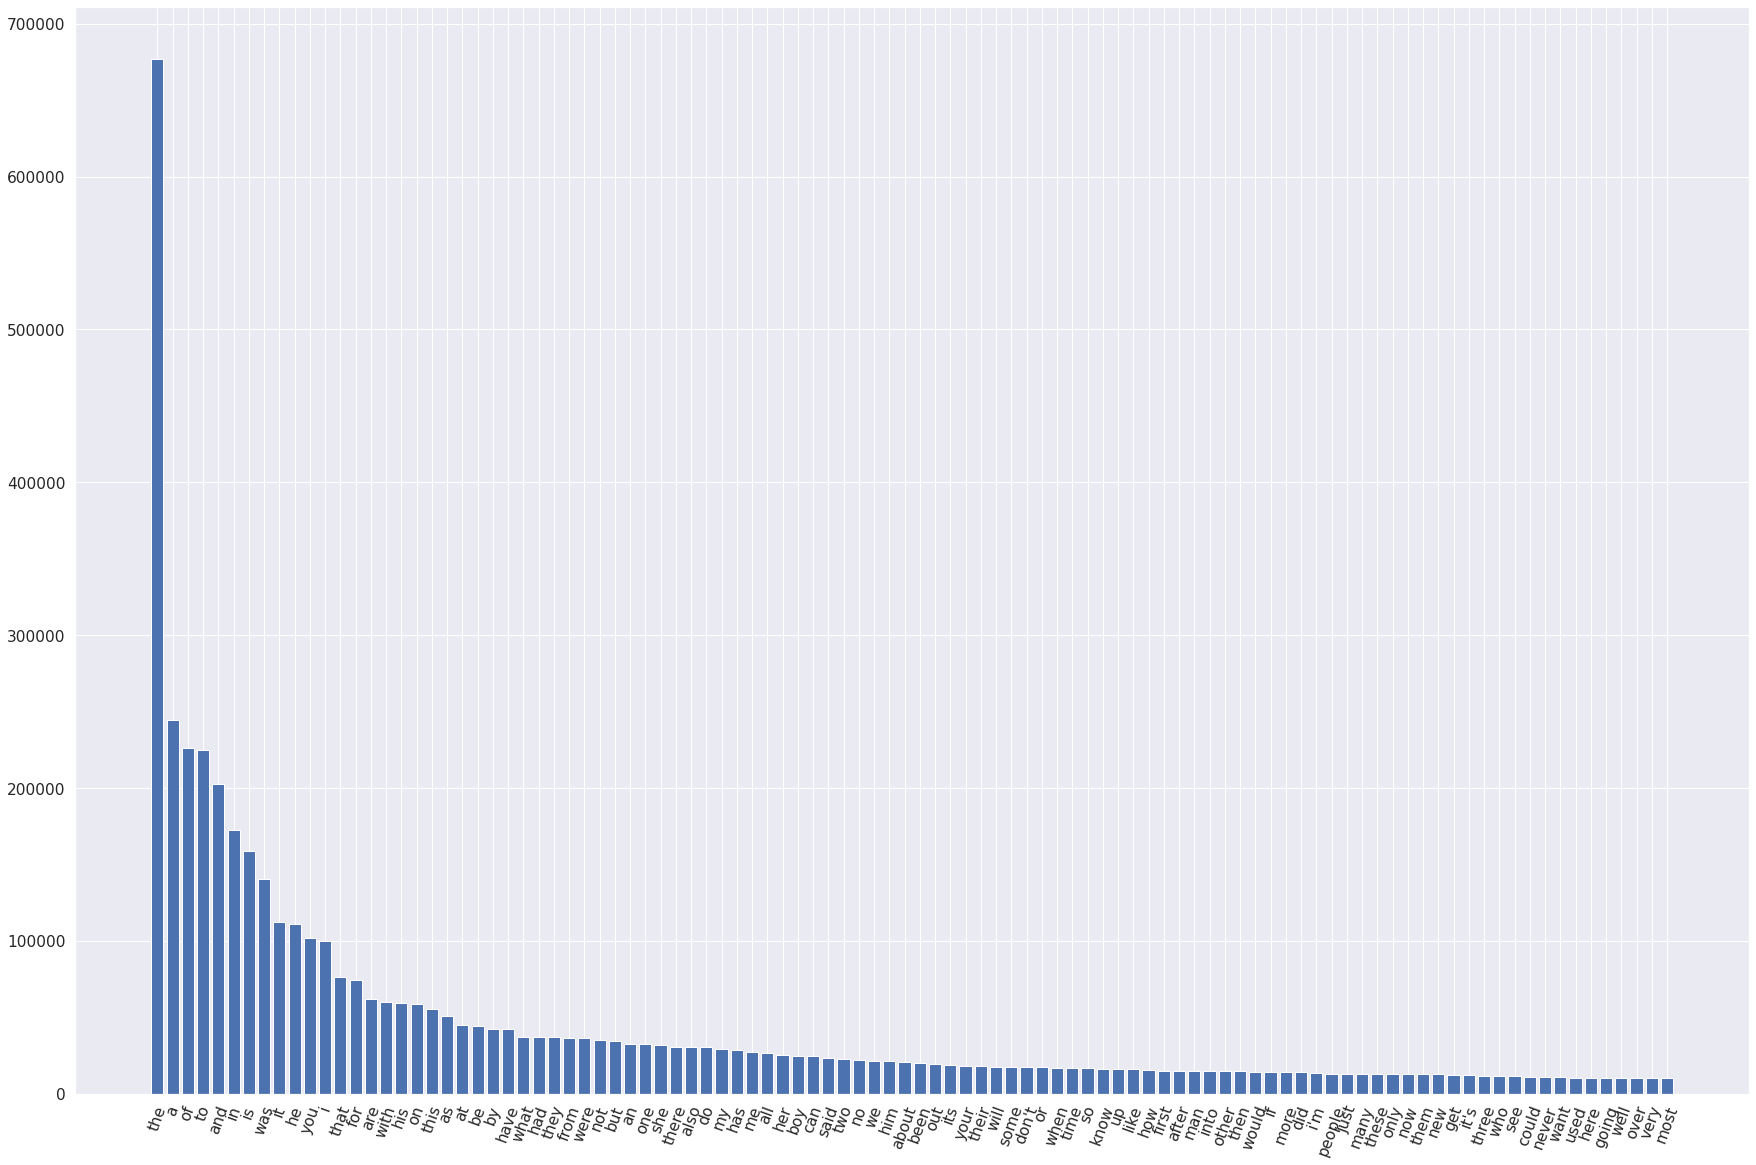

In [29]:
fig,ax = plt.subplots()
topn = common[:100]
ax.bar([c[0] for c in topn], [c[1] for c in topn]);
fig.set_size_inches(30,20)
ax.set_xticklabels([c[0] for c in topn], rotation=70);

/home/mark/miniconda3/envs/tinyspeech/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


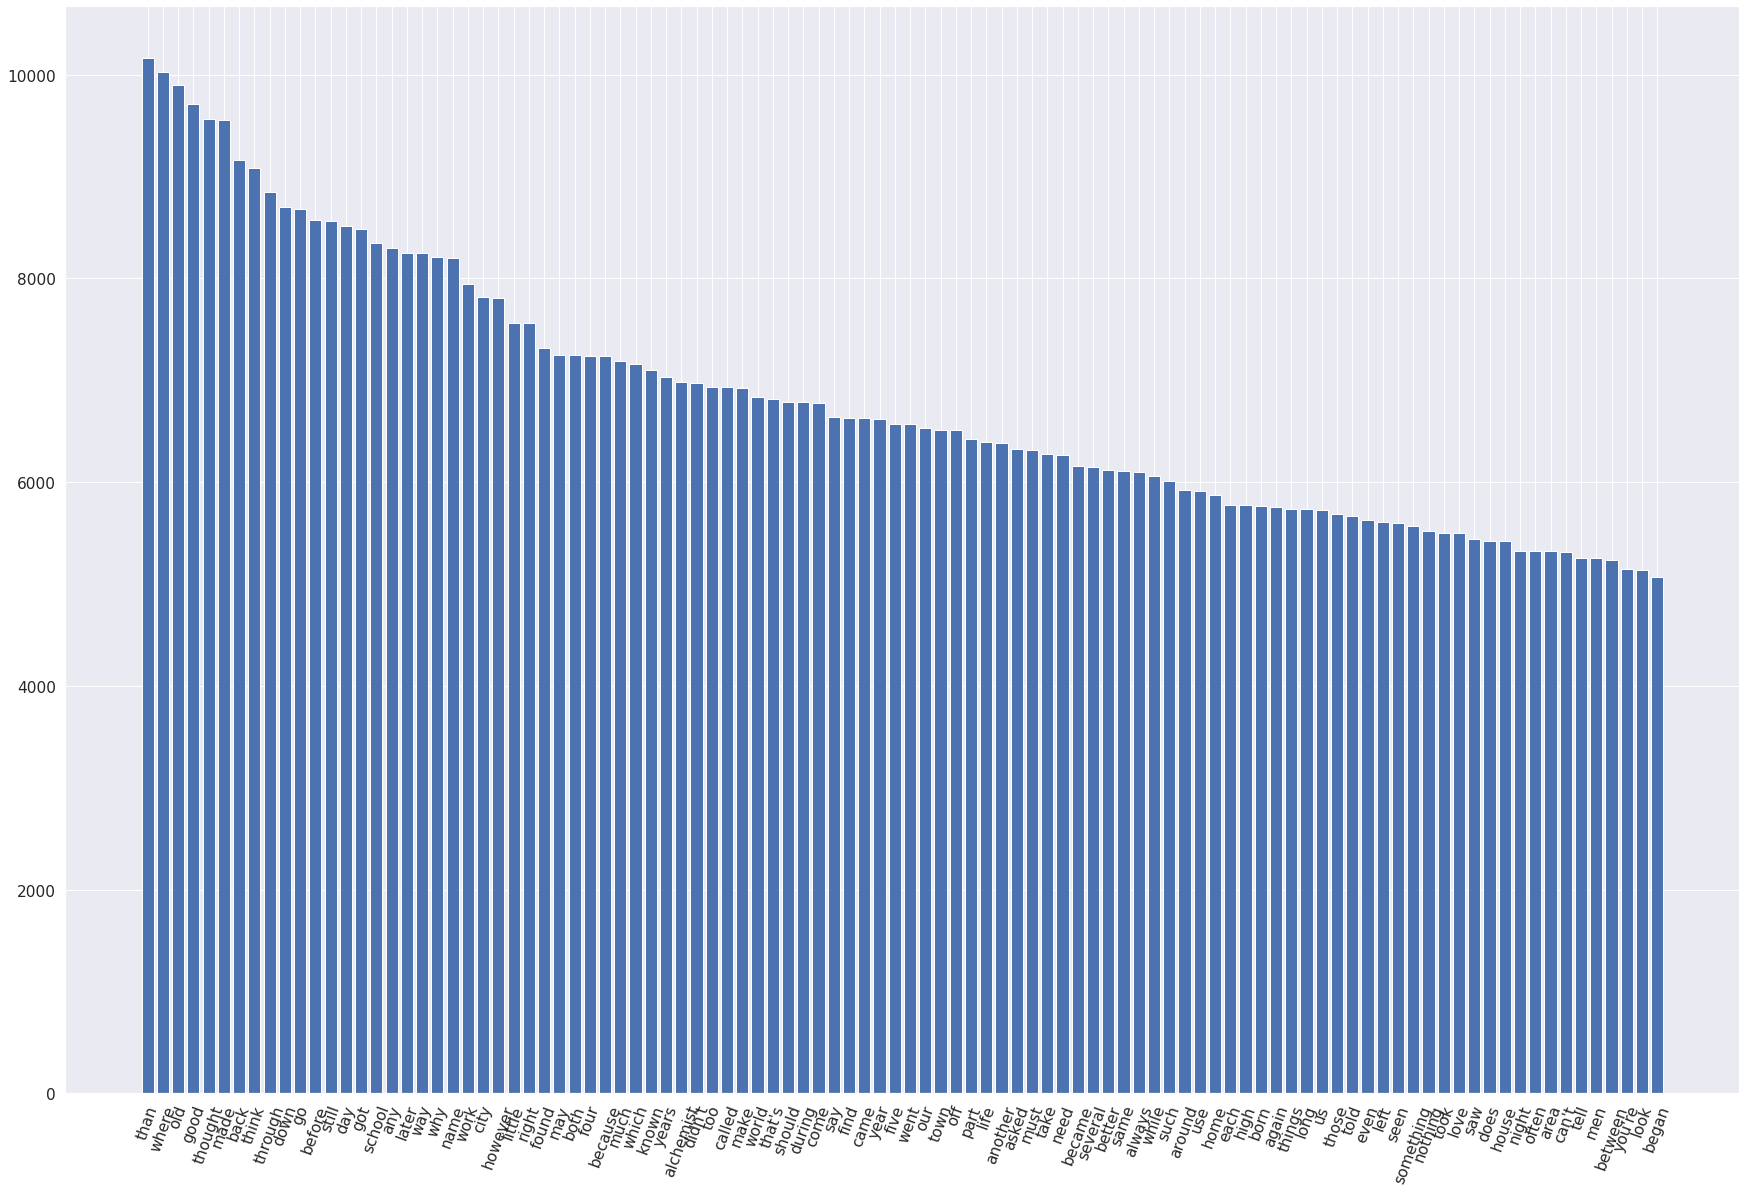

In [30]:
fig,ax = plt.subplots()
topn = common[100:200]
ax.bar([c[0] for c in topn], [c[1] for c in topn]);
fig.set_size_inches(30,20)
ax.set_xticklabels([c[0] for c in topn], rotation=70);

/home/mark/miniconda3/envs/tinyspeech/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


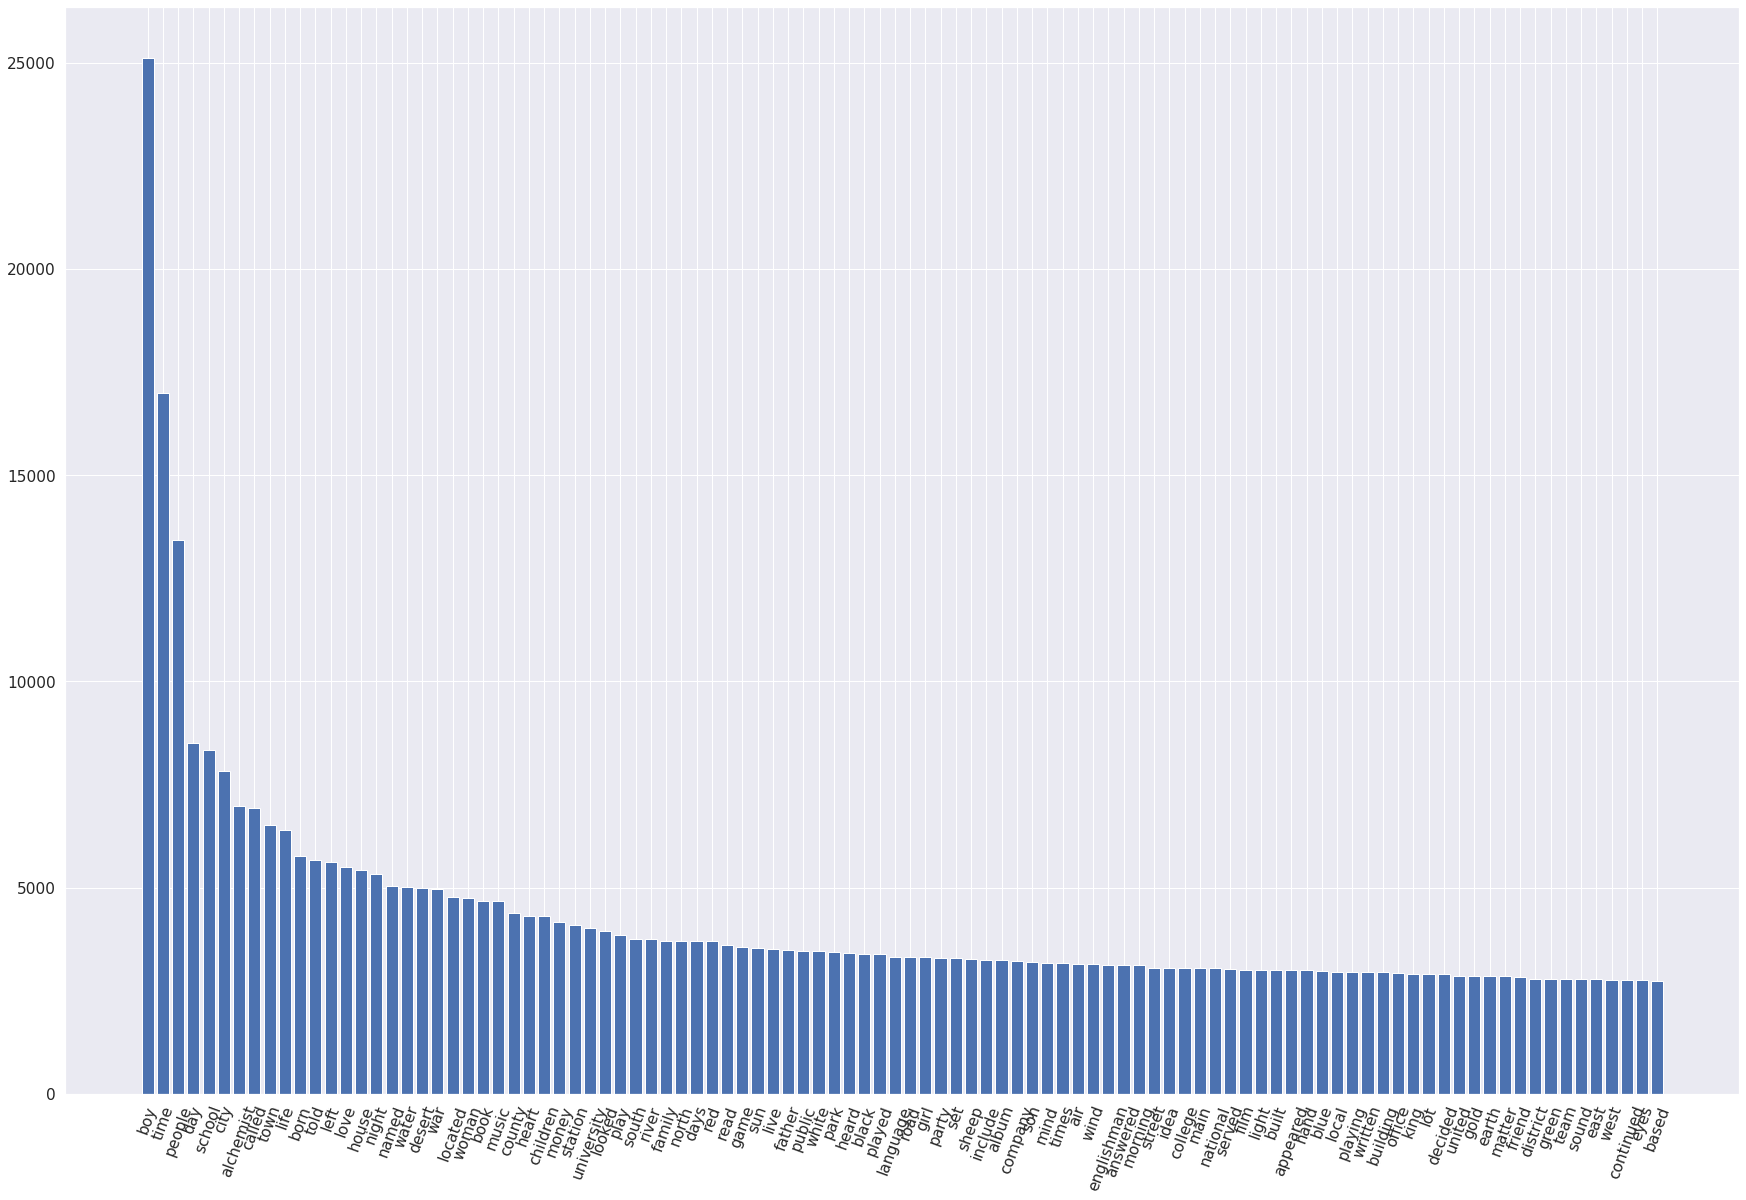

In [31]:
fig,ax = plt.subplots()
topn = filtered_en.most_common(100)
ax.bar([c[0] for c in topn], [c[1] for c in topn]);
fig.set_size_inches(30,20)
ax.set_xticklabels([c[0] for c in topn], rotation=70);

In [39]:
data = []
for lang,(frequencies, frequencies_without_stopwords) in counts.items():
    if frequencies_without_stopwords is not None:
        data.append((lang, frequencies.most_common(1), frequencies.most_common(100)[-1], frequencies_without_stopwords.most_common(1), frequencies_without_stopwords.most_common(100)[-1]))
    else:
        data.append((lang, frequencies.most_common(1), frequencies.most_common(100)[-1]))
pd.DataFrame(data, columns=["lang", "most common word", "100th most common word", "most common non-stopword", "100th most common non-stopword"])

,lang,most common word,100th most common word,most common non-stopword,100th most common non-stopword
0,pl,"[(—, 19949)]","(dobrze, 537)","[(—, 19949)]","(lubię, 220)"
1,id,"[(saya, 2157)]","(siapa, 68)","[(tom, 586)]","(kobayashi, 36)"
2,de,"[(die, 138036)]","(damit, 4258)","[(hauptstadt, 10877)]","(gehören, 943)"
3,ja,"[(はち, 46)]","(彼等が敵に向かうとはあっぱれであった。, 2)","[(はち, 46)]","(彼女は迷子になった男の子を探しまわった。, 2)"
4,cy,"[(yn, 29357)]","(bobl, 744)",None,None
5,eo,"[(la, 27642)]","(bona, 426)","[(pri, 2006)]","(vidas, 227)"
6,eu,"[(eta, 12922)]","(egon, 440)","[(behar, 2258)]","(ikusten, 334)"
7,uk,"[(не, 2665)]","(тільки, 115)","[(не, 2665)]","(них, 77)"
8,ca,"[(de, 175575)]","(ni, 2589)","[(venim, 11417)]","(segona, 1299)"
9,br,"[(a, 1625)]","(perak, 61)","[(sur, 140)]","(barzh, 18)"


In [4]:
speech_commands_dataset = [
    ("Backward", 1664, True),
    ("Bed", 2014, False),
    ("Bird", 2064, False),
    ("Cat", 2031, False),
    ("Dog", 2128, False),
    ("Down", 3917, True),
    ("Eight", 3787, True),
    ("Five", 4052, True),
    ("Follow", 1579, True),
    ("Forward", 1557, True),
    ("Four", 3728, True),
    ("Go", 3880, True),
    ("Happy", 2054, False),
    ("House", 2113, False),
    ("Learn", 1575, True),
    ("Left", 3801, True),
    ("Marvin", 2100, False),
    ("Nine", 3934, True),
    ("No", 3941, True),
    ("Off", 3745, True),
    ("On", 3845, True),
    ("One", 3890, True),
    ("Right", 3778, True),
    ("Seven", 3998, True),
    ("Sheila", 2022, False),
    ("Six", 3860, True),
    ("Stop", 3872, True),
    ("Three", 3727, True),
    ("Tree", 1759, False),
    ("Two", 3880, True),
    ("Up", 3723, True),
    ("Visual", 1592, True),
    ("Wow", 2123, False),
    ("Yes", 4044, True),
    ("Zero", 4052, True),
]

In [5]:
speech_commands_dataset = [(k.lower(), c, t) for (k,c,t) in speech_commands_dataset]

In [6]:
sc = pd.DataFrame(speech_commands_dataset, columns=['keyword', 'counts', 'command'])

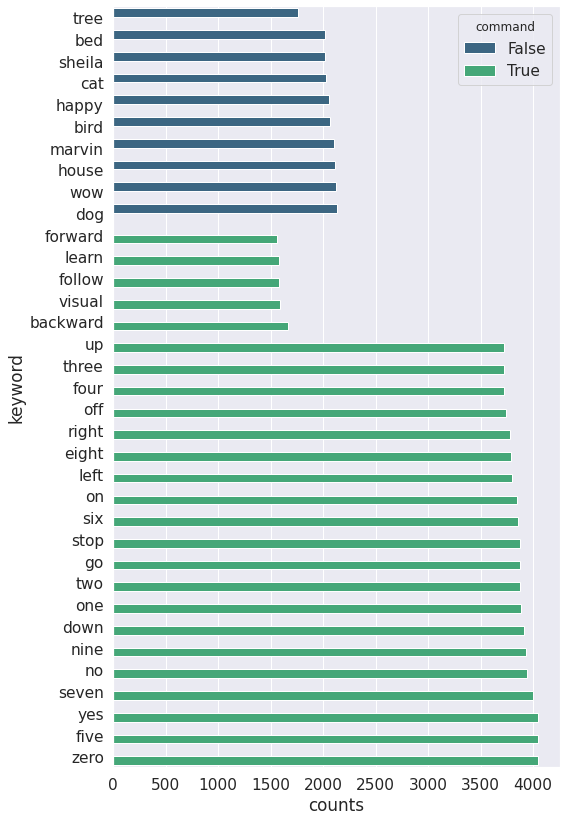

In [7]:
sns.barplot(
    x="counts",
    y="keyword",
    hue="command",
    palette="viridis",
    data=sc.sort_values(["command", "counts"]),
)
plt.gcf().set_size_inches(8, 14)

In [8]:
keywords = set([k for (k, _, _) in speech_commands_dataset])

In [65]:
def clean_and_filter(keyword_set: Set[str], sentence: str) -> List[str]:
    tokens = nltk.word_tokenize(sentence)
    words = [word.lower() for word in tokens if word.isalpha()]
    return list(filter(lambda w: w in keyword_set, words))

def update_counts(counts: Dict[str, int], words: List[str]) -> None:
    for w in words:
        counts[w] += 1

def count_occurences(keyword_set, tsv):
    df = pd.read_csv(tsv, sep="\t")
    
    # there are NaNs in test.tsv['sentence']
    # https://stackoverflow.com/a/50533971
    df.sentence.dropna(inplace=True)
    
    print("Dataset:", tsv)
    print("Number of mp3s:", df.shape[0])
    
    #def tokenize_by_keyword(row):
    #    return clean_and_filter(keyword_set, row.sentence)

    counts = {k:0 for k in keyword_set}
    
    # TODO(MMAZ) inefficient
    df['keywords'] = df.sentence.apply(functools.partial(clean_and_filter, keyword_set))
    
    df.keywords.dropna(inplace=True)
    usable = df.keywords.transform(len)
    print("mp3s containing speechcommands keywords", usable[usable > 0].shape[0])
    
    _ = [update_counts(counts, tokens) for tokens in df.keywords]
    
    return counts

In [10]:
def plot_counts(counts, title):
    df = pd.DataFrame(list(counts.items()), columns=["keyword", "counts"])
    sns.barplot(x="counts", y="keyword", data=df).set_title(title)
    plt.gcf().set_size_inches(10, 15)

In [74]:
def plot_uncommon(
    counts, title, common=["on", "one", "two", "three", "four", "no", "up", "down"]
):
    """view counts without the most common words"""
    without = {k: v for k, v in counts.items() if k not in common}
    plot_counts(without, title)

## Common Voice Analysis

Data is split across these TSVs in Common Voice. 

In [11]:
# TSVs
common_voice = "../mozilla_common_voice/"
TRAIN = common_voice + "train.tsv"
DEV = common_voice + "dev.tsv"
TEST = common_voice + "test.tsv"
VAL = common_voice + "validated.tsv"
# ignoring {other, invalidated}

Dataset: ../mozilla_common_voice/train.tsv
Number of mp3s: 232975
mp3s containing speechcommands keywords 44917


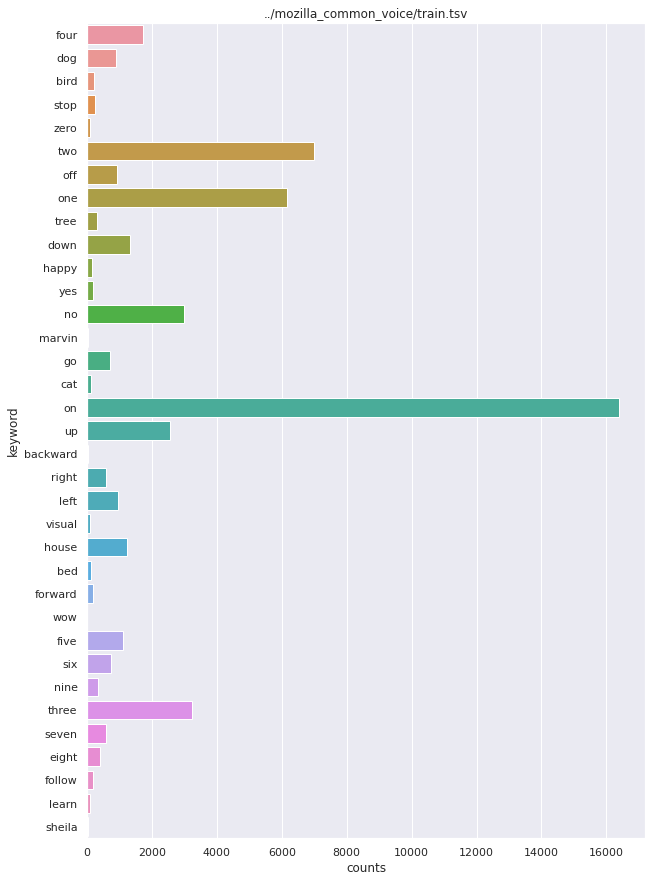

In [69]:
train_counts = count_occurences(keywords, TRAIN)
plot_counts(train_counts, TRAIN)

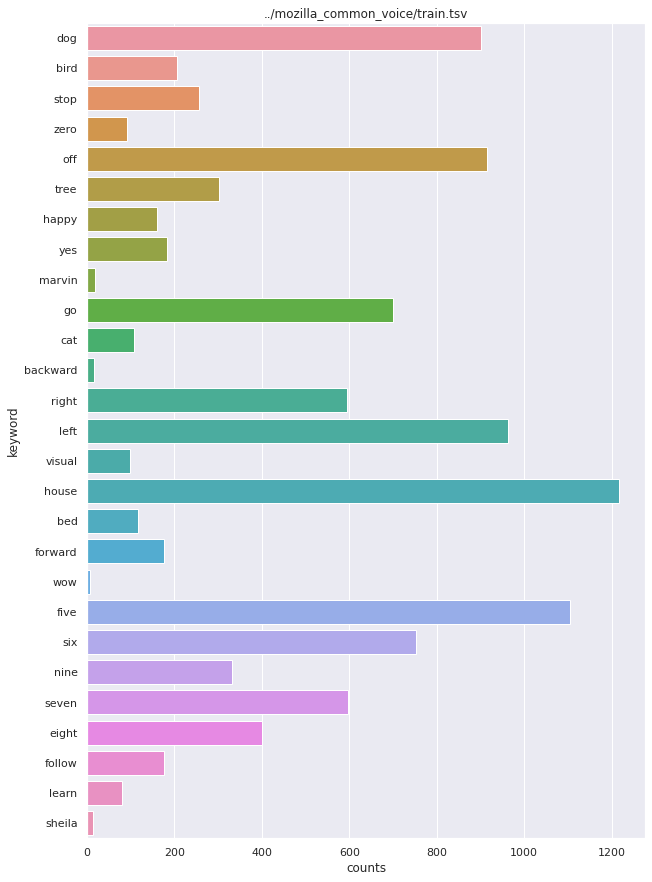

In [75]:
plot_uncommon(train_counts, TRAIN)

Dataset: ../mozilla_common_voice/dev.tsv
Number of mp3s: 15531
mp3s containing speechcommands keywords 2830


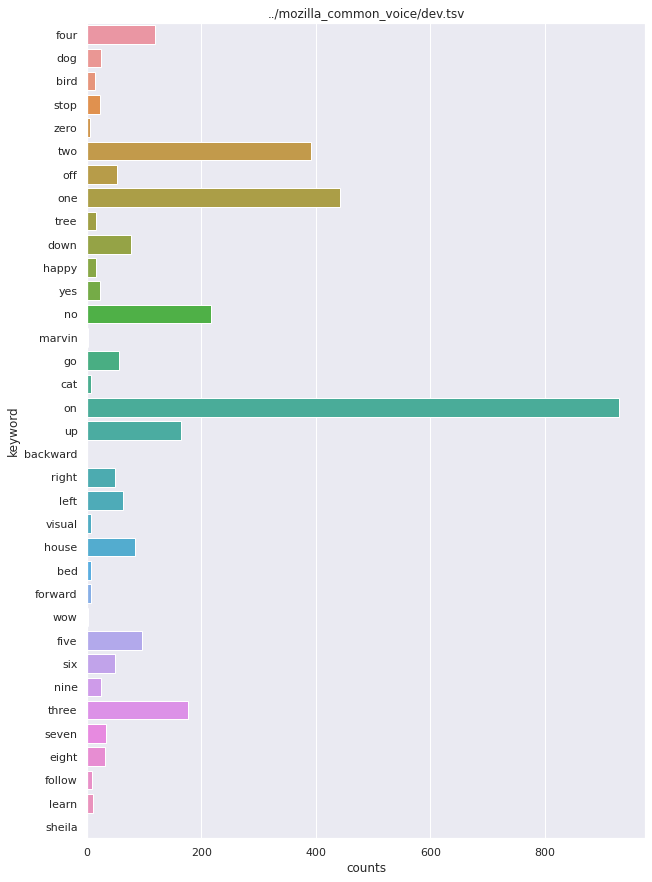

In [76]:
dev_counts = count_occurences(keywords, DEV)
plot_counts(dev_counts, DEV)

Dataset: ../mozilla_common_voice/test.tsv
Number of mp3s: 15531
mp3s containing speechcommands keywords 3121


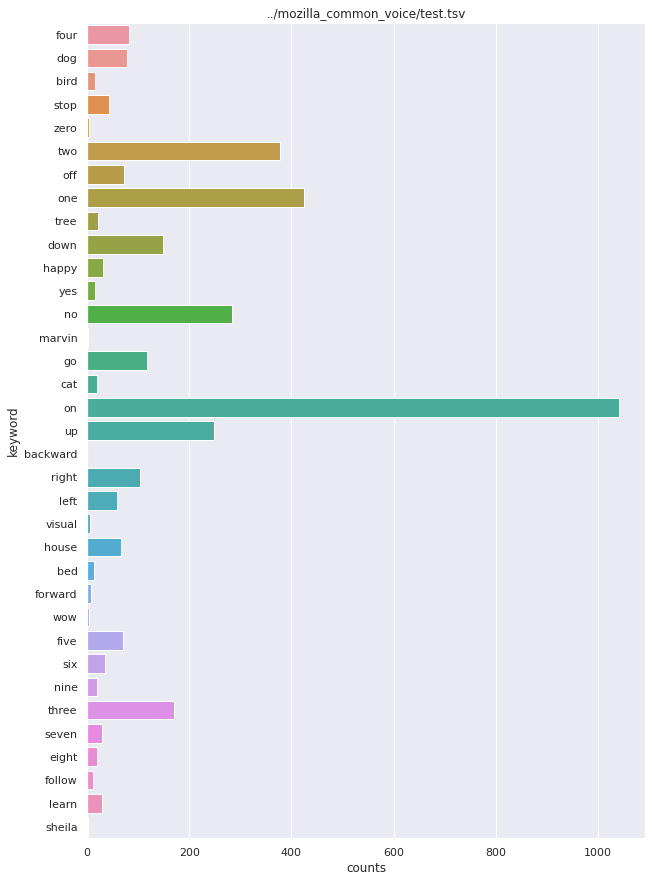

In [77]:
test_counts = count_occurences(keywords, TEST)
plot_counts(test_counts, TEST)

In [52]:
# sidenote: there's a bad row in test.tsv:
df = pd.read_csv(TEST, sep="\t")
df[df.sentence.isna()]

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
458,2a23c7be6a9665215496be5e793ad9a334721810990672...,common_voice_en_16759015.mp3,NaN,2,0,NaN,NaN,NaN


### `validated.tsv`

Note that `validated.tsv` is much larger than all of the splits (train/dev/test) combined. [See here for details:](https://discourse.mozilla.org/t/why-train-tsv-includes-a-few-files-just-3-of-validated-set/36471/6)

> The reason is that many sentences were read multiple times by different people, and in machine learning you do not want a training set to be biased or it will result in a biased model trained from the biased training data set. So repeats of read sentences, even though validated, were removed when validated.tsv was distributed among train.tsv, dev.tsv, and test.tsv.

/home/mark/miniconda3/envs/deepspeech/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Dataset: ../mozilla_common_voice/validated.tsv
Number of mp3s: 854444
mp3s containing speechcommands keywords 162362


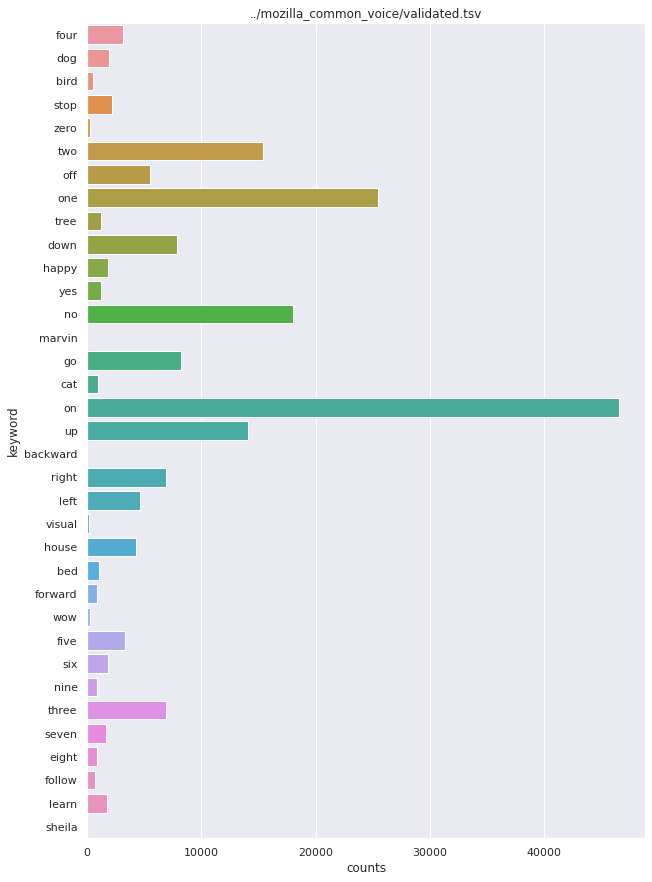

In [78]:
val_counts = count_occurences(keywords, VAL)
plot_counts(val_counts, VAL)

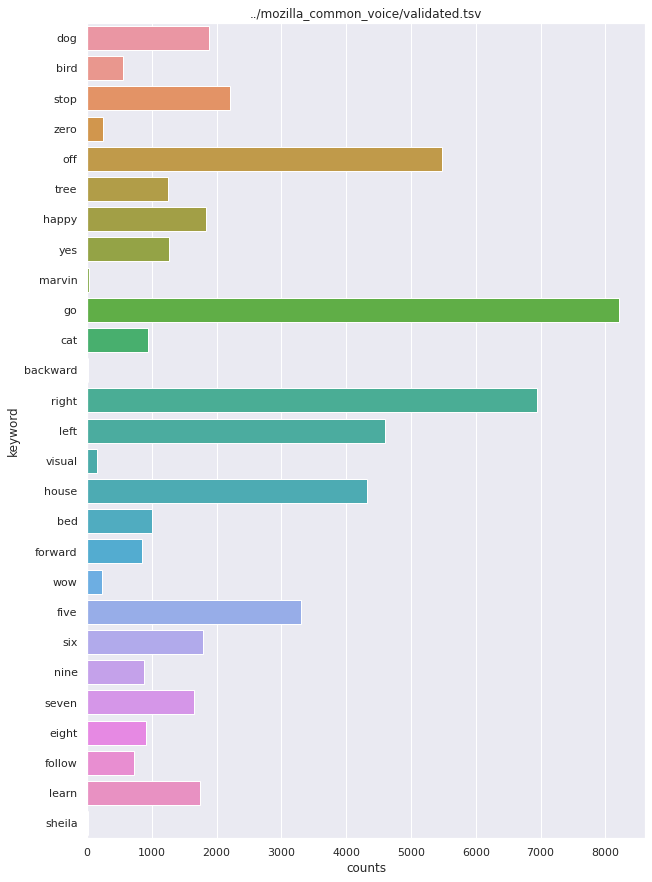

In [79]:
plot_uncommon(val_counts, VAL)

## Comparing the Common Voice data in aggregate with Speech Commands

In [141]:
train_df = pd.DataFrame(train_counts.items(), columns=["keyword", "train"])
dev_df = pd.DataFrame(dev_counts.items(), columns=["keyword", "dev"])
test_df = pd.DataFrame(test_counts.items(), columns=["keyword", "test"])
val_df = pd.DataFrame(val_counts.items(), columns=["keyword", "val"])

Combining train/dev/test

In [142]:
comparison = pd.concat([train_df.keyword, sc.counts, train_df.train, dev_df.dev, test_df.test, val_df.val], axis=1, sort=False)
comparison.rename(columns={"counts":"speech_commands"},inplace=True)
comparison.insert(5, column="train/dev/test", value=train_df.train + dev_df.dev + test_df.test)

In [143]:
comparison

,keyword,speech_commands,train,dev,test,train/dev/test,val
0,four,1664,1726,118,83,1927,3176
1,dog,2014,901,24,79,1004,1882
2,bird,2064,206,13,16,235,559
3,stop,2031,257,22,42,321,2211
4,zero,2128,91,5,4,100,240
5,two,3917,6996,392,378,7766,15420
6,off,3787,914,52,73,1039,5475
7,one,4052,6149,443,424,7016,25485
8,tree,1579,302,16,21,339,1251
9,down,1557,1317,76,149,1542,7916


In [186]:
# TODO(MMAZ) this is a hacky/lazy way to rearrange for visualization
# speech_commands counts
s2 = sc[['keyword', 'counts']].copy()
s2['source'] = "speech_commands"
# train/dev/test counts
tdt = comparison[['keyword', 'train/dev/test']].copy()
tdt.rename(columns={"train/dev/test":"counts"},inplace=True)
tdt['source'] = 'train/dev/test'
# validation counts
v = comparison[['keyword', 'val']].copy()
v.rename(columns={"val":"counts"},inplace=True)
v['source']="validation"
# sandwich it together:
sc_vs_tdt = pd.concat([s2,tdt])
total = pd.concat([s2,tdt,v])

### Word frequency in Speech Commands vs Common Voice Train/Dev/Test

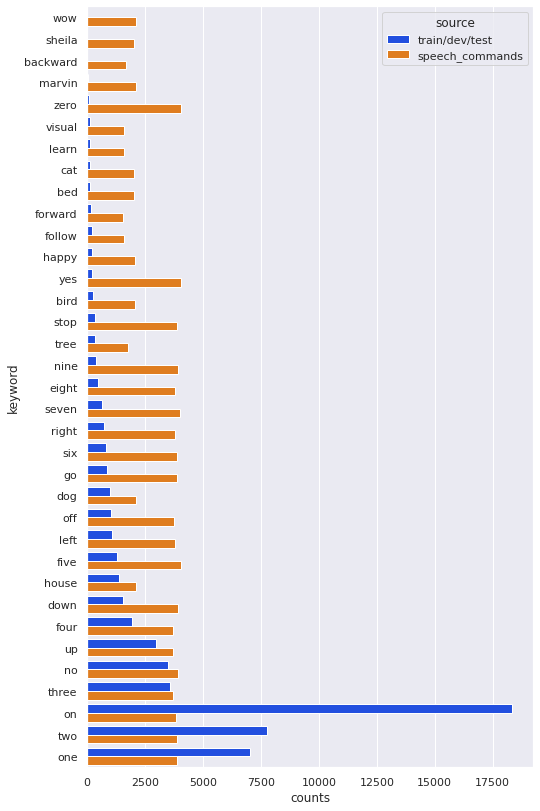

In [188]:
fig, ax = plt.subplots()
p = sns.barplot(
    x="counts",
    y="keyword",
    hue="source",
    palette="bright",
    data=sc_vs_tdt.sort_values(["counts"]),
    ax=ax
)
fig.set_size_inches(8, 14)
#p.set(xlim=(0,5000));

### Word frequency in Speech Commands vs Common Voice Train/Dev/Test vs Common Voice Validation

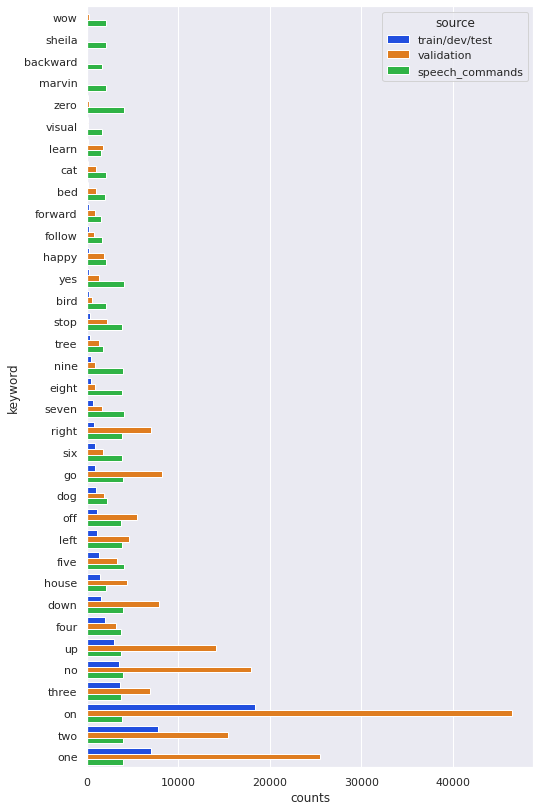

In [192]:
fig, ax = plt.subplots()
p = sns.barplot(
    x="counts",
    y="keyword",
    hue="source",
    palette="bright",
    data=total.sort_values(["counts"]),
    ax=ax
)
fig.set_size_inches(8, 14)

truncating at 5000:

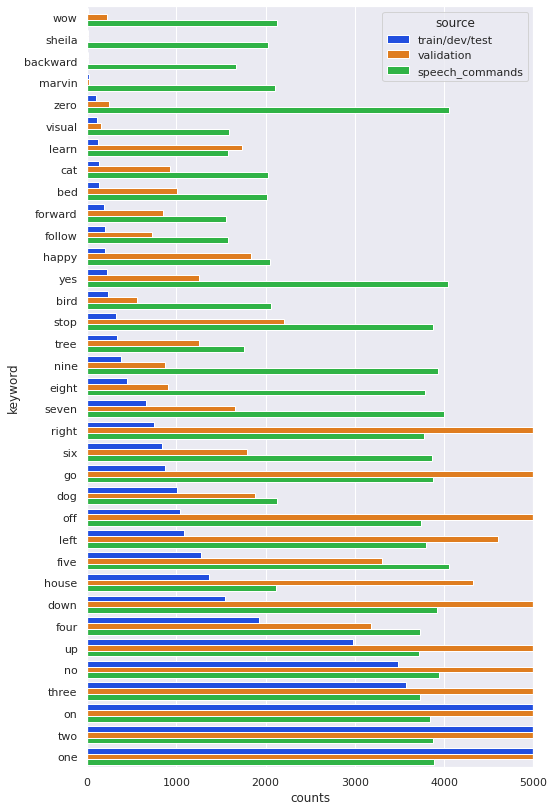

In [191]:
fig, ax = plt.subplots()
p = sns.barplot(
    x="counts",
    y="keyword",
    hue="source",
    palette="bright",
    data=total.sort_values(["counts"]),
    ax=ax
)
fig.set_size_inches(8, 14)
p.set(xlim=(0,5000));

## Questions

### 1. Should we include homonyms?

* `one`, `won`
* `two`, `to`
* `four`, `for`
* `right`, `write`
* `eight`, `ate`

any others? `house` vs `how's`? (marginal)

**Note:** `to` and `for` are overwhelmingly common [stop words](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html) - they might cause training biases.

### 2. What about plurals/stems/posessives?

* `bed` vs `beds` (non-command word)
* `backward` vs `backwards`
* `stop` vs `stops`
* `right` vs `rights`
* `house` vs `houses` vs `house's`
* etc...


In [161]:
homonyms = set(["won", "write", "ate"])
homonyms_count = count_occurences(homonyms, TRAIN)

Dataset: ../mozilla_common_voice/en/train.tsv
Number of mp3s: 232975
Sentences with speechcommands keywords 1059


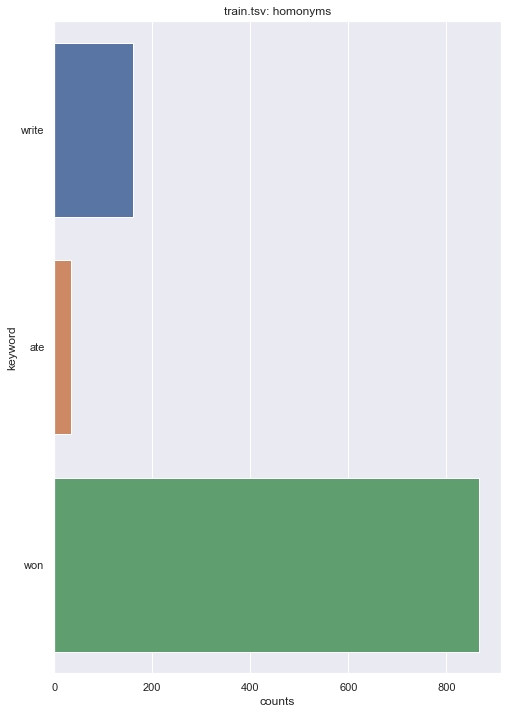

In [162]:
plot_counts(homonyms_count, "train.tsv: homonyms")

In [164]:
stopwords_count = count_occurences(set(["to", "for"]), TRAIN)

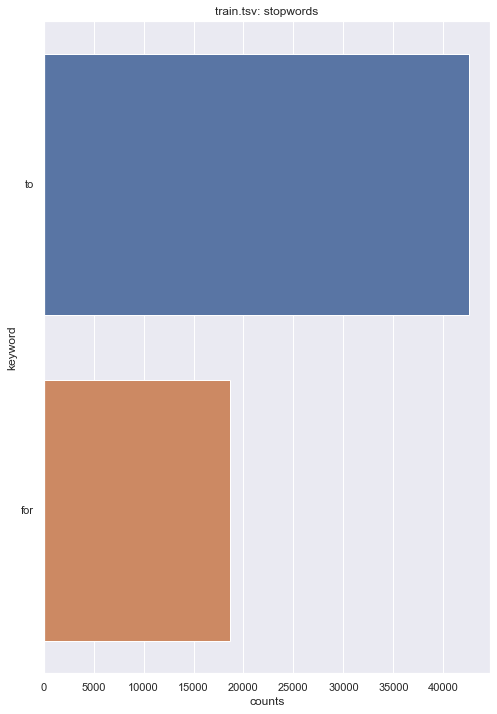

In [165]:
plot_counts(stopwords_count, "train.tsv: stopwords")

## Mozilla Common Voice Speech Commands
Single Word Target Segment
https://voice.mozilla.org/en/datasets
    


In [8]:
sw = "../commonvoice_singleword/cv-corpus-5-singleword"
langs = os.listdir(sw)
swcounts = {}
for lang in langs:
    validated = f"{sw}/{lang}/validated.tsv"
    with open(validated, 'r') as v:
        swcounts[lang] = sum(1 for line in v) - 1 # skip header
print(swcounts)
swcounts = pd.DataFrame(swcounts.items(), columns=["language", "validated"])

{'pl': 898, 'id': 101, 'de': 12191, 'ja': 503, 'cy': 232, 'eo': 770, 'eu': 170, 'ca': 2231, 'pt': 945, 'en': 26070, 'ar': 316, 'tr': 343, 'fr': 16467, 'tt': 5, 'ta': 203, 'es': 22290, 'nl': 447, 'ru': 1476}


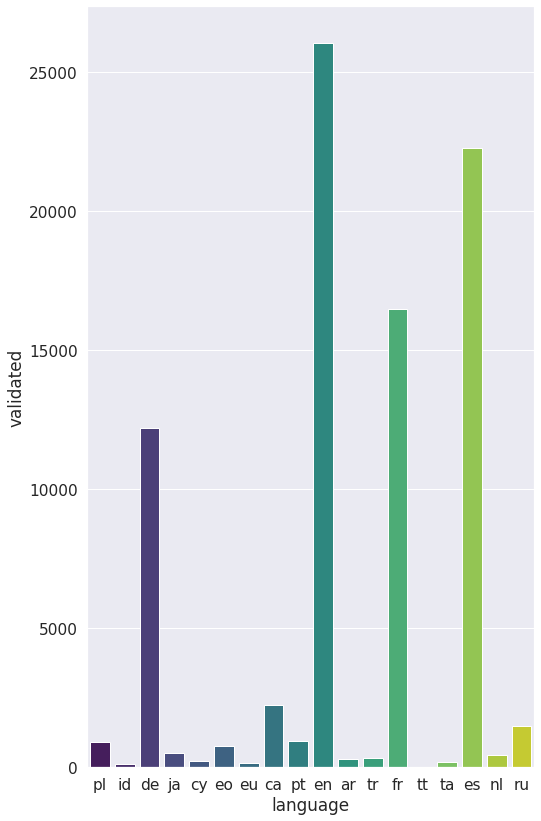

In [9]:
sns.barplot(
    x="language",
    y="validated",
    palette="viridis",
    data=swcounts
)
plt.gcf().set_size_inches(8, 14)